# 研究背景

2019新型冠状病毒 （Novel coronavirus），世界卫生组织命名缩写为2019-nCoV，又名武汉冠状病毒（Wuhan coronavirus），是一种具有包膜的正链单股RNA冠状病毒，为2019年底出现的新型冠状病毒感染的肺炎疫情的病原。在疫情爆发期间，研究人员对肺炎阳性患者样本进行核酸检测以及基因组测序后发现了这一病毒。

中华人民共和国国家卫生健康委员会将此病毒定为法定乙类传染病，按甲类管理。截至东八区时间2020年2月1日7:40，全球共确诊约11300例，疑似约15238例，死亡258例，治愈230例。由于观察到在新型冠状病毒传播期间，人民日报也异常活跃，两者具有相关性。为了抑制新型冠状病毒的传播，研究人员对人民日报与新型冠状病毒间的关系展开了研究。

# 研究方法

## 研究假设
1. 本研究基于在新型冠状病毒爆发期检测到的人民日报的异常活跃状况，假设人民日报发文与新型冠状病毒流行成正相关关系。
2. 发现抑制新型冠状病毒的方法就应该及时公布。
3. 抑制新型冠状病毒的方法无论对治疗新型冠状病毒效果是否显著都应该公布。
4. 抑制新型冠状病毒的方法无论是否与喝白开水效果相近也应该大力宣传。


* 研究假设2、3、4基于人民日报近期刊文理论。

## 实验设计
### 实验组
研究人员通过收集近期人民日报发文数量与新型冠状病毒（下文称2019-nCoV）流行的趋势，确定人民日报与2019-nCoV的相关性。

### 对照组
服用双黄连与抑制2019-nCoV的相关性。

### 研究声明
- 本研究未接收人民日报其竞争对手如新华社、青年报、财新App等的捐赠。
- 本研究仅对事实进行搜集呈现，结论提出基于人民日报的逻辑，即研究假设2、3、4。

# 实验分析
本实验将收集2019-nCoV传播数据及人民日报发文数据，客观呈现人民日报与2019-nCoV的相关性。

## 数据来源
本实验数据中确诊人数由世界卫生组织提供。
https://www.who.int/emergencies/diseases/novel-coronavirus-2019/situation-reports

|  日期   | 1.21 | 2.22 | 1.23 | 1.24 | 1.25 | 1.26 | 1.27 | 1.28 | 1.29 | 1.30 | 1.31|
|  ----  | ---- |  ----  | ---- |  ----  | ---- |  ----  | ---- |  ----  | ---- |  ----  | ---- |
| 中国 nCoV 累计确诊人数  | 278 | 309 | 571 | 830 | 1297 | 1985 | 2761 | 4537| 5997 | 7736| 9720 |
| 人民日报微博数量  | 66 | 72 | 125 | 142 | 146 | 131 | 156 | 149 | 143 | 118 | 188 |
| 人民日报21日起累计微博数量| 66 | 138 | 263 | 405 | 551 | 682 | 838 | 987 | 1130 | 1248 | 1436|

- 人民日报发微数量由肉眼统计得到，难免有误差，平均误差均值±5.


## 相关性分析
本研究下面将进一步分析人民日报发微与新型冠状病毒的相关性。

In [19]:
%matplotlib inline
# 如果不添加这句，是无法直接在jupyter里看到图的
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
time = list(range(21,32))
nCoV = [278, 309, 571, 830, 1297, 1985, 2761, 4537, 5997, 7736, 9720]
weibo =  [66, 138, 263, 405, 551, 682, 838, 987, 1130, 1248, 1436]

对实验数据进行规范化处理，缩放到[0,1]区间，方便在同一量级上比较相关性。

### 可视化观察
我们先来直观感受下nCoV的确诊量和人民日报发微数量的关系。

In [63]:
df = pd.DataFrame(columns = ['nCoV','weibo'])
df['nCoV'] =  [num/max(nCoV) for num in nCoV]
df['weibo'] = [num/max(weibo) for num in weibo]

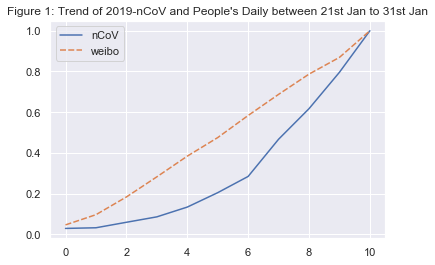

In [85]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

 
sns.set_style('whitegrid',{'font.sans-serif':['Arial Unicode MS','Arial']})
sns.set(style="darkgrid")
# height 高度，linewidth线宽，aspect 长宽比
g = sns.lineplot(data=df).set_title('Figure 1: Trend of 2019-nCoV and People\'s Daily between 21st Jan to 31st Jan')


从上图1中我们可以看出，nCoV的数据不断逼近人民日报发微数量，并在昨日产生交叉，并有愈演愈烈的趋势。如果不加以干涉，增长将十分剧烈。

### 相关性分析

皮尔逊相关性公式：

$ R_{xy}=\frac{\sum_{k=1}^n(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{k=1}^n(x_i-\bar{x})^2\sum_{k=1}^n(y_i-\bar{y})^2}} $

当皮尔逊相关系数为1时，成为完全正相关；当相关系数为-1时，成为完全负相关；相关系数的绝对值越大，相关性越强；相关系数越接近于0，相关度越弱。

In [66]:
def mean(x):
    return sum(x)/len(x)
def covariance(x,y):
    calc = []
    for i in range(len(x)):
        xi = x[i] - mean(x)
        yi = y[i] - mean(y)
        calc.append(xi * yi)
    return sum(calc)/(len(x) - 1)

In [73]:
print(covariance(df['nCoV'] ,df['weibo']))

0.10343762537684698


根据上面的计算，皮尔逊相关性大于0，两者成正相关，即人民日报发文与nCoV发展成正相关！！！

### 对照实验
本研究服用双黄连与抑制2019-nCoV的相关性。

由于人民日报未公布相关实验数据，我们可以科学地假设其实验结果中相关性大于0（否则人民日报属于完全虚假宣传）。

而由于其实验只花费了一个晚上（研究人员并不知道为什么能这么快，我数人民日报发的微博都花了一上午），我们有理由相信其实验没有时间进行重复验证，因此不建议推测其为强相关性。

我们也注意到部分研究人员对我们选取的对照组有强烈的质疑。该反对意见表示细胞贴壁都要花一天，一个晚上不可能完成实验，我们对此也没有合理解释。

# 结论
人民日报发文与nCoV发展成正相关，根据实验假设2、3、4，我们认为人民日报的快速发文会诱导2019-nCoV的不断蔓延，所以必须采取措施予以抑制。建议如下：
1. 取关人民日报
2. 人民日报自行停刊

# 学术诚信披露
由于本研究的对照组可信度过低，本研究被Arxiv拒稿，研究人员以后会换个靠谱点的对照组（偷偷吐槽：都是人民日报坑我们）。